# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [8]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

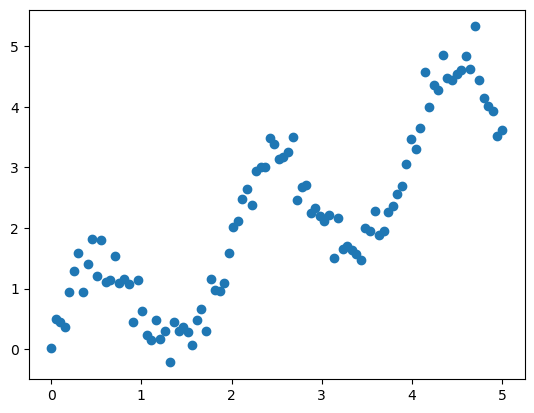

In [9]:
plt.scatter(x,y)

#### nonlinear

In [10]:
regr_lin = LinearRegression()

In [11]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [12]:
regr_lin.fit(X,y)

LinearRegression()

0.6522209948196905


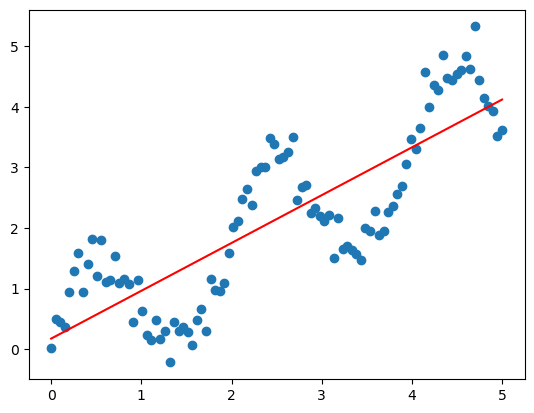

In [13]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [15]:
print(x.shape)

(100,)


In [21]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [22]:
regr_poly = LinearRegression()

In [23]:
regr_poly.fit(X_poly, y)

LinearRegression()

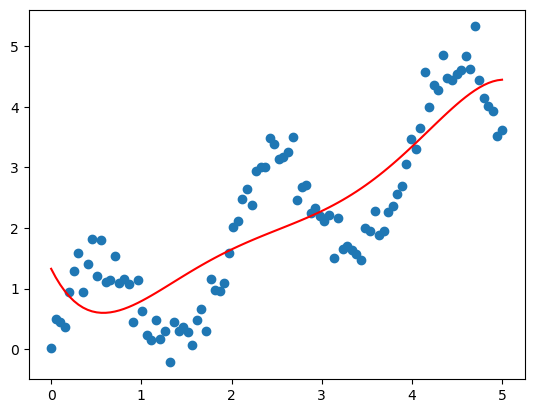

In [24]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [25]:
print('Coefficients: ', regr_poly.coef_) #斜率
print('interception: ', regr_poly.intercept_) #截距

Coefficients:  [-2.98181741  3.89625571 -1.78822151  0.36745491 -0.02736211]
interception:  1.3262577706647658


In [28]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.32625777, 1.18537136, 1.06301275, 0.95788446, 0.8687442 ,
       0.79440383, 0.73372829, 0.68563449, 0.64909023, 0.62311318,
       0.60676972, 0.5991739 , 0.59948639, 0.60691333, 0.62070532,
       0.64015632, 0.66460252, 0.69342136, 0.72603035, 0.76188607,
       0.80048303, 0.84135265, 0.88406212, 0.92821337, 0.97344197,
       1.01941604, 1.0658352 , 1.11242946, 1.15895818, 1.20520894,
       1.25099651, 1.29616174, 1.34057048, 1.38411253, 1.42670053,
       1.46826891, 1.50877277, 1.54818684, 1.58650439, 1.62373614,
       1.6599092 , 1.69506596, 1.72926304, 1.76257022, 1.79506932,
       1.82685314, 1.85802441, 1.88869466, 1.91898319, 1.94901596,
       1.97892451, 2.00884489, 2.0389166 , 2.06928147, 2.10008262,
       2.13146336, 2.16356611, 2.19653133, 2.23049644, 2.26559473,
       2.30195431, 2.33969697, 2.37893719, 2.41978098, 2.46232486,
       2.50665471, 2.5528448 , 2.60095658, 2.65103772, 2.70312095,
       2.75722302, 2.81334361, 2.87146425, 2.93154725, 2.99353

In [29]:
regr_poly.predict(X_poly)

array([1.32625777, 1.18537136, 1.06301275, 0.95788446, 0.8687442 ,
       0.79440383, 0.73372829, 0.68563449, 0.64909023, 0.62311318,
       0.60676972, 0.5991739 , 0.59948639, 0.60691333, 0.62070532,
       0.64015632, 0.66460252, 0.69342136, 0.72603035, 0.76188607,
       0.80048303, 0.84135265, 0.88406212, 0.92821337, 0.97344197,
       1.01941604, 1.0658352 , 1.11242946, 1.15895818, 1.20520894,
       1.25099651, 1.29616174, 1.34057048, 1.38411253, 1.42670053,
       1.46826891, 1.50877277, 1.54818684, 1.58650439, 1.62373614,
       1.6599092 , 1.69506596, 1.72926304, 1.76257022, 1.79506932,
       1.82685314, 1.85802441, 1.88869466, 1.91898319, 1.94901596,
       1.97892451, 2.00884489, 2.0389166 , 2.06928147, 2.10008262,
       2.13146336, 2.16356611, 2.19653133, 2.23049644, 2.26559473,
       2.30195431, 2.33969697, 2.37893719, 2.41978098, 2.46232486,
       2.50665471, 2.5528448 , 2.60095658, 2.65103772, 2.70312095,
       2.75722302, 2.81334361, 2.87146425, 2.93154725, 2.99353

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [30]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [31]:
sigma = 0.3

In [32]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [33]:
regr_rbf = LinearRegression()

In [35]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

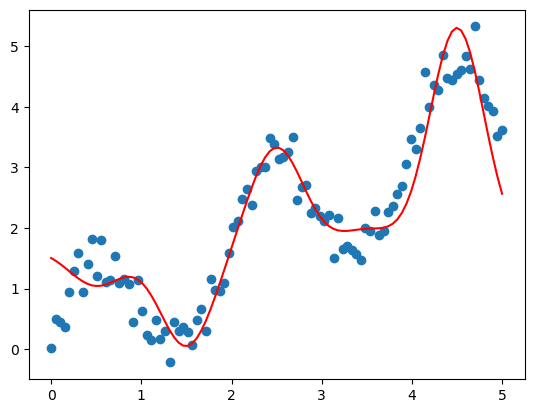

In [37]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [38]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.60727497 -1.61094503  1.6779215   0.31109703  3.64877969]
interception:  1.6558361189285014


#### Comparison

In [39]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

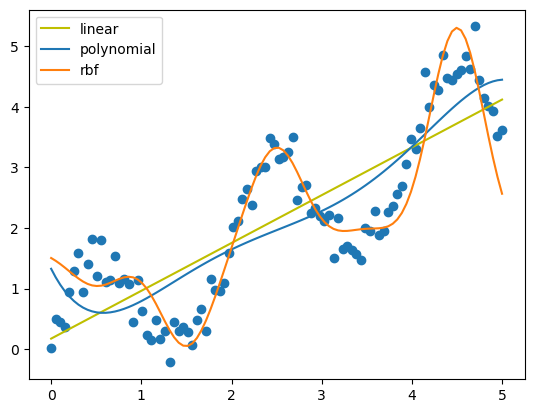

In [45]:
plt.scatter(x,y)

plt.plot(x, Y_lin, 'y', label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [46]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6522209948196905


In [47]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5737370888916052


In [48]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.20811532286297751
